In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import matplotlib.gridspec as gridspec

In [2]:
# population_df = pd.read_excel(open('Population Growth.xls','rb'), sheet_name='Data',header = 3 ,index_col = 0)
# del population_df['Indicator Name']
# del population_df['Indicator Code']
# population_df.head()

In [3]:
urban_df = pd.read_excel(open('Urban Population.xls','rb'), sheet_name='Data',header = 3)
del urban_df['Indicator Name']
del urban_df['Indicator Code']

urban_df['Country Name'] = urban_df['Country Name'].str.replace('Korea, Rep.','South Korea')
urban_df['Country Name'] = urban_df['Country Name'].str.replace('Korea, Dem. People’s Rep.','North Korea')
urban_df['Country Name'] = urban_df['Country Name'].str.replace('Hong Kong SAR, China','Hong Kong')
urban_df['Country Name'] = urban_df['Country Name'].str.replace('Macao SAR, China','Macau')

name = urban_df.columns.tolist()
name[name.index('Country Name')] = 'Country'
urban_df.columns = name
urban_df = urban_df.set_index('Country')
urban_df = urban_df.loc[:,'2010':'2019']
urban_df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,
Aruba,43778.0,43819.0,44057.0,44348.0,44665.0,44979.0,45296.0,45616.0,45948.0,46295.0
Afghanistan,6927764.0,7212518.0,7528588.0,7865067.0,8204877.0,8535606.0,8852859.0,9164841.0,9477100.0,9797273.0
Angola,13963065.0,14660282.0,15383127.0,16130304.0,16900847.0,17691524.0,18502165.0,19332881.0,20184707.0,21061025.0
Albania,1519519.0,1546929.0,1575788.0,1603505.0,1630119.0,1654503.0,1680247.0,1706345.0,1728969.0,1747593.0
Andorra,75007.0,74305.0,73056.0,71515.0,70057.0,68919.0,68213.0,67876.0,67813.0,67873.0


In [4]:
rular_df = pd.read_excel(open('Rular Population.xls','rb'), sheet_name='Data',header = 3)
del rular_df['Indicator Name']
del rular_df['Indicator Code']

rular_df['Country Name'] = rular_df['Country Name'].str.replace('Korea, Rep.','South Korea')
rular_df['Country Name'] = rular_df['Country Name'].str.replace('Korea, Dem. People’s Rep.','North Korea')
rular_df['Country Name'] = rular_df['Country Name'].str.replace('Hong Kong SAR, China','Hong Kong')
rular_df['Country Name'] = rular_df['Country Name'].str.replace('Macao SAR, China','Macau')

rular_df.columns = name
rular_df = rular_df.set_index('Country')
rular_df = rular_df.loc[:,'2010':'2019']

In [5]:
def to_billion(x):
    return x / 1000000000

In [6]:
south_asian_urban = urban_df.loc[urban_df.index
                           .isin(['Nepal','India','Pakistan','Bhutan','Afghanistan','Bangladesh','Maldives','Sri Lanka'])]
south_asian_urban = south_asian_urban.apply(to_billion)
south_asian_urban

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,
Afghanistan,0.006928,0.007213,0.007529,0.007865,0.008205,0.008536,0.008853,0.009165,0.009477,0.009797
Bangladesh,0.044954,0.046611,0.048312,0.050049,0.051818,0.053608,0.055421,0.057255,0.059108,0.060987
Bhutan,0.000239,0.000247,0.000255,0.000264,0.000273,0.000282,0.000290,0.000299,0.000309,0.000318
India,0.381763,0.391040,0.400418,0.409909,0.419568,0.429429,0.439499,0.449789,0.460296,0.471032
Sri Lanka,0.003693,0.003715,0.003717,0.003746,0.003785,0.003828,0.003882,0.003942,0.004004,0.004052
Maldives,0.000133,0.000140,0.000148,0.000157,0.000166,0.000175,0.000185,0.000195,0.000205,0.000214
Nepal,0.004530,0.004626,0.004712,0.004795,0.004892,0.005013,0.005164,0.005342,0.005545,0.005766
Pakistan,0.062793,0.064540,0.066313,0.068114,0.069957,0.071846,0.073782,0.075762,0.077811,0.079928


In [7]:
south_asian_rular = rular_df.loc[rular_df.index
                           .isin(['Nepal','India','Pakistan','Bhutan','Afghanistan','Bangladesh','Maldives','Sri Lanka'])]
south_asian_rular = south_asian_rular.apply(to_billion)
south_asian_rular

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,
Afghanistan,0.022258,0.022905,0.023633,0.024405,0.025166,0.025878,0.026530,0.027132,0.027695,0.028244
Bangladesh,0.102621,0.102663,0.102696,0.102716,0.102702,0.102648,0.102550,0.102416,0.102248,0.102059
Bhutan,0.000447,0.000447,0.000446,0.000446,0.000446,0.000446,0.000446,0.000446,0.000446,0.000446
India,0.852518,0.859248,0.865365,0.870937,0.876036,0.880724,0.885011,0.888869,0.892322,0.895386
Sri Lanka,0.016569,0.016684,0.016708,0.016839,0.016993,0.017142,0.017321,0.017502,0.017666,0.017751
Maldives,0.000232,0.000240,0.000249,0.000259,0.000269,0.000280,0.000290,0.000301,0.000310,0.000317
Nepal,0.022484,0.022415,0.022278,0.022122,0.022015,0.022002,0.022097,0.022285,0.022543,0.022843
Pakistan,0.116631,0.118801,0.120969,0.123148,0.125350,0.127581,0.129845,0.132135,0.134404,0.136638


In [8]:
east_asian_rural = rular_df.loc[rular_df.index
                           .isin(['China','Japan','Mongolia','North Korea','South Korea','Hong Kong','Macau'])]
east_asian_rural = east_asian_rural.apply(to_billion)
east_asian_rural

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,
China,0.679206,0.665196,0.651508,0.637792,0.624031,0.610193,0.596466,0.582840,0.568902,0.554781
Hong Kong,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Japan,0.011767,0.011417,0.011298,0.011182,0.011068,0.010958,0.010849,0.010732,0.010608,0.010483
South Korea,0.008951,0.009027,0.009111,0.009189,0.009283,0.009369,0.009444,0.009500,0.009568,0.009602
Macau,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mongolia,0.000882,0.000888,0.000903,0.000919,0.000936,0.000953,0.000969,0.000985,0.001000,0.001015
North Korea,0.009727,0.009732,0.009737,0.009743,0.009748,0.009752,0.009751,0.009745,0.009735,0.009719


In [9]:
east_asian_urban = urban_df.loc[urban_df.index
                           .isin(['China','Japan','Mongolia','North Korea','South Korea','Hong Kong','Macau'])]
east_asian_urban = east_asian_urban.apply(to_billion)
east_asian_urban

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,
China,0.658499,0.678934,0.699187,0.719588,0.740239,0.761027,0.782199,0.803555,0.823828,0.842934
Hong Kong,0.007024,0.007072,0.007150,0.007179,0.007229,0.007291,0.007337,0.007392,0.007451,0.007507
Japan,0.116303,0.116416,0.116331,0.116263,0.116208,0.116183,0.116145,0.116053,0.115921,0.115782
South Korea,0.040603,0.040910,0.041089,0.041240,0.041464,0.041646,0.041774,0.041861,0.042038,0.042107
Macau,0.000538,0.000551,0.000564,0.000577,0.000590,0.000602,0.000613,0.000623,0.000632,0.000640
Mongolia,0.001838,0.001883,0.001922,0.001962,0.002004,0.002046,0.002087,0.002129,0.002170,0.002211
North Korea,0.014822,0.014941,0.015063,0.015187,0.015310,0.015432,0.015557,0.015685,0.015815,0.015947


In [10]:
r1=east_asian_urban.sum(axis=0).tolist()
ins_inds = 10
r1[ins_inds:ins_inds] = ["Sum"]
print(r1)
east_asian_urban['Country'] = east_asian_urban.index
r1_series = pd.Series(r1,index = east_asian_urban.columns)
east_asian_urban = east_asian_urban.append(r1_series,ignore_index=True)
east_asian_urban = east_asian_urban.set_index('Country')

[0.83962627, 0.8607060459999999, 0.881306808, 0.901996289, 0.92304447, 0.9442264760000001, 0.9657127689999999, 0.9872970830000001, 1.007854364, 1.02712898, 'Sum']


In [11]:
r2=east_asian_rural.sum(axis=0).tolist()
ins_inds = 10
r2[ins_inds:ins_inds] = ["Sum"]
print(r2)
east_asian_rural['Country'] = east_asian_rural.index
r2_series = pd.Series(r2,index = east_asian_rural.columns)
east_asian_rural = east_asian_rural.append(r2_series,ignore_index=True)
east_asian_rural = east_asian_rural.set_index('Country')

[0.7105339930000001, 0.696259771, 0.6825564949999999, 0.66882512, 0.655065757, 0.6412251280000001, 0.6274780839999999, 0.613803674, 0.5998140319999999, 0.585599222, 'Sum']


In [12]:
row2=south_asian_urban.sum(axis=0).tolist()
insert_inds = 10
row2[insert_inds:insert_inds] = ["Sum"]
print(row2)
south_asian_urban['Country'] = south_asian_urban.index
b_series = pd.Series(row2,index = south_asian_urban.columns)
south_asian_urban = south_asian_urban.append(b_series,ignore_index=True)
south_asian_urban = south_asian_urban.set_index('Country')

[0.505032837, 0.518131083, 0.531402503, 0.544899425, 0.5586645979999999, 0.572716484, 0.5870768359999999, 0.6017498020000002, 0.616753576, 0.6320927639999999, 'Sum']


In [13]:
row=south_asian_rular.sum(axis=0).tolist()
insert_ind = 10
row[insert_ind:insert_ind] = ["Sum"]
print(row)
south_asian_rular['Country'] = south_asian_rular.index
a_series = pd.Series(row,index = south_asian_rular.columns)
south_asian_rular = south_asian_rular.append(a_series,ignore_index=True)
south_asian_rular = south_asian_rular.set_index('Country')

[1.1337600970000001, 1.1434033289999999, 1.1523446269999997, 1.160872625, 1.168976369, 1.176700584, 1.1840903580000002, 1.191085806, 1.1976351680000001, 1.203683978, 'Sum']


In [14]:
south_asian_rular = south_asian_rular.astype('float64').round(2)
south_asian_urban = south_asian_urban.astype('float64').round(2) 
east_asian_rural = east_asian_rural.astype('float64').round(2)
east_asian_urban = east_asian_urban.astype('float64').round(2) 

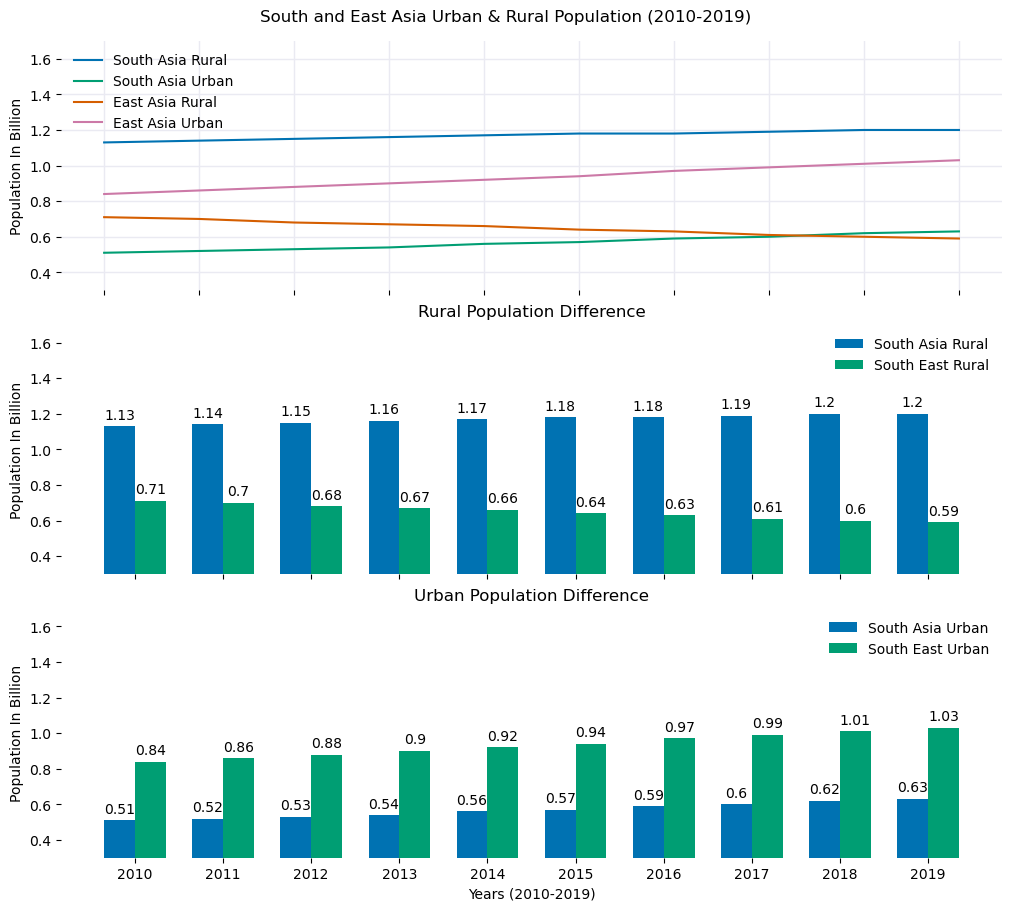

In [28]:
fig2 = plt.figure(constrained_layout=True,figsize=(10, 9),dpi=100, facecolor='w', edgecolor='k')
spec2 = gridspec.GridSpec(ncols=2, nrows=3, figure=fig2)
plt.style.use('seaborn-colorblind')
f2_ax1 = fig2.add_subplot(spec2[0, :])
years = south_asian_rular.columns.tolist()

f2_ax1.plot(south_asian_rular.iloc[8],label='South Asia Rural')
f2_ax1.plot(south_asian_urban.iloc[8],label='South Asia Urban')
f2_ax1.plot(east_asian_rural.iloc[7],label='East Asia Rural')
f2_ax1.plot(east_asian_urban.iloc[7],label='East Asia Urban')

plt.xticks(rotation=45)
f2_ax1.set_ylim([0.3,1.7])
f2_ax1.grid(color='#eaeaf2',lw = 1)
f2_ax1.set_ylabel('Population In Billion')
fig2.suptitle('South and East Asia Urban & Rural Population (2010-2019)')
plt.xlabel('Year')
f2_ax1.legend(loc ='best', frameon=False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)


f2_ax2 = fig2.add_subplot(spec2[1, :])
bar_width = 0.35

pos = np.arange(len(years))
population = south_asian_rular.iloc[8].tolist()
population2 = east_asian_rural.iloc[7].tolist()
bars = f2_ax2.bar(pos - bar_width/2,  population,bar_width, align='center', linewidth=0, label='South Asia Rural')
bars2 = f2_ax2.bar(pos + bar_width/2,  population2,bar_width, align='center', linewidth=0,label='South East Rural')
plt.xticks(pos,years)
plt.xlabel('Year')
f2_ax2.set_ylabel('Population In Billion')
f2_ax2.set_ylim([0.3,1.7])
f2_ax2.set_title('Rural Population Difference')
f2_ax2.legend(loc ='best', frameon=False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

f2_ax3 = fig2.add_subplot(spec2[2,:])    
bar_width = 0.35
population = south_asian_urban.iloc[8].tolist()
population2 = east_asian_urban.iloc[7].tolist()
bar = f2_ax3.bar(pos - bar_width/2,  population,bar_width, align='center', linewidth=0,label='South Asia Urban')
bar2 = f2_ax3.bar(pos + bar_width/2,  population2,bar_width, align='center', linewidth=0,label='South East Urban')
plt.xticks(pos,years)
plt.xlabel('Years (2010-2019)')
f2_ax3.set_ylabel('Population In Billion')
f2_ax3.set_title('Urban Population Difference')
f2_ax3.set_ylim([0.3,1.7])
f2_ax3.legend(loc ='best', frameon=False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

def autolabel(rects,x):
    for rect in rects:
        height = rect.get_height()
        x.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')        
autolabel(bars,f2_ax2)
autolabel(bars2,f2_ax2)
autolabel(bar,f2_ax3)
autolabel(bar2,f2_ax3)

for ax in fig2.get_axes():
    ax.label_outer()       
plt.show()